<a href="https://colab.research.google.com/github/dickytrianza/AllAboutBugBounty/blob/master/zaid_baseline_amd_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss
from xgboost import XGBClassifier
from scipy.stats import mode

# Load Dataset

In [63]:
df = pd.read_csv('/content/drive/MyDrive/FYP/Datasets/train.csv')
parsed = df.iloc[:, 0].apply(lambda x: list(map(int, x.split(';'))))
df_parsed = pd.DataFrame(parsed.tolist())

X = df_parsed.iloc[:, :-1].values
y = df_parsed.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Data Preprocessing

## Feature Selection

In [64]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
top20_idx = np.argsort(rf.feature_importances_)[-20:]
X_train_top20 = X_train[:, top20_idx]
X_test_top20 = X_test[:, top20_idx]

## Feature Scaling

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top20)
X_test_scaled = scaler.transform(X_test_top20)

X_train_cnn = X_train_scaled.reshape(-1, 20, 1)
X_test_cnn = X_test_scaled.reshape(-1, 20, 1)

# Compute Class Weight

In [66]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

# Reshape for CNN

In [67]:
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# CNN Model

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 20, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 18, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 9, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 7, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feature_dense (Dense)           │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,169 (121.75 KB)

 Trainable params: 31,169 (121.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.5575 - loss: 0.6768 - val_accuracy: 0.7969 - val_loss: 0.5413
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8548 - loss: 0.5019 - val_accuracy: 0.8125 - val_loss: 0.4184
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8877 - loss: 0.4044 - val_accuracy: 0.8594 - val_loss: 0.3381
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8787 - loss: 0.3659 - val_accuracy: 0.8594 - val_loss: 0.3181
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8974 - loss: 0.3082 - val_accuracy: 0.8594 - val_loss: 0.3328
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8927 - loss: 0.3118 - val_accuracy: 0.8438 - val_loss: 0.3334
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8844 - loss: 0.3165 - val_accuracy: 0.8438 - val_loss: 0.3293
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8925 - loss: 0.2761 - val_accuracy: 0.8594 - val_loss:

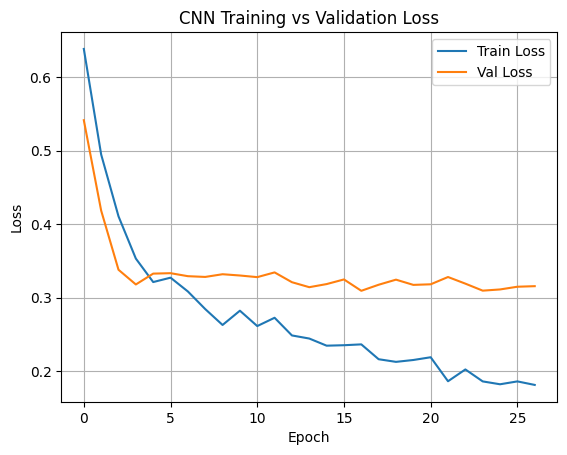

In [68]:
input_layer = Input(shape=(20, 1))
x = Conv1D(32, kernel_size=3, activation='relu')(input_layer)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(64, kernel_size=3, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu', name="feature_dense")(x)
x = Dropout(0.6)(x)
output = Dense(1, activation='sigmoid')(x)

cnn_model = Model(inputs=input_layer, outputs=output)
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = cnn_model.fit(
    X_train_cnn, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stop]
)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("CNN Training vs Validation Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.grid(True); plt.show()

## Evaluation

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

 Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       159
           1       0.93      0.90      0.92       159

    accuracy                           0.92       318
   macro avg       0.92      0.92      0.92       318
weighted avg       0.92      0.92      0.92       318



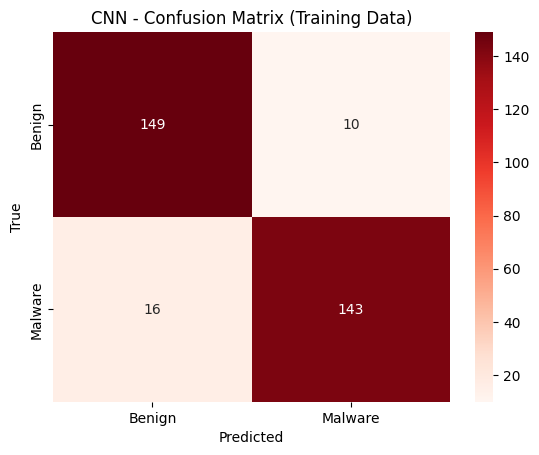

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

 Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.90      0.88      0.89        40

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.89      0.89      0.89        80



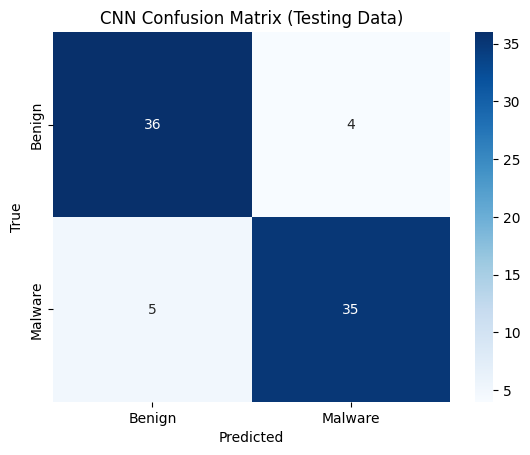

In [69]:
# Training Evaluation - CNN
cnn_train_pred = (cnn_model.predict(X_train_cnn) > 0.5).astype(int)
print("\n Classification Report (Training Data):")
print(classification_report(y_train, cnn_train_pred))

sns.heatmap(confusion_matrix(y_train, cnn_train_pred), annot=True, fmt='d', cmap='Reds',
            xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
plt.title("CNN - Confusion Matrix (Training Data)")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.show()

# Testing Evaluation - CNN
cnn_test_pred = (cnn_model.predict(X_test_cnn) > 0.5).astype(int)
print("\n Classification Report (Testing Data):")
print(classification_report(y_test, cnn_test_pred))

sns.heatmap(confusion_matrix(y_test, cnn_test_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
plt.title("CNN Confusion Matrix (Testing Data)")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.show()

# XGBoost Model

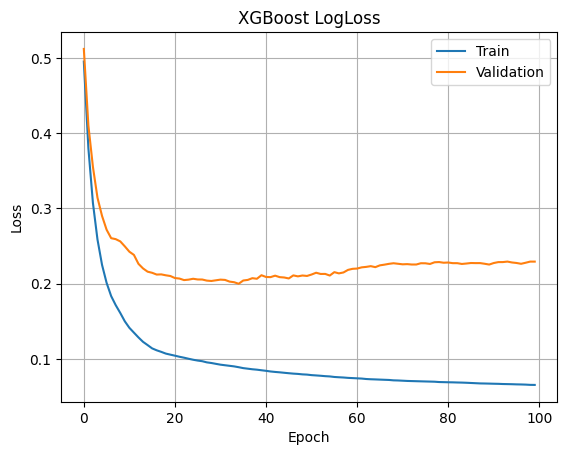

In [70]:
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)],
    verbose=False
)

xgb_eval = xgb_model.evals_result()
plt.plot(xgb_eval['validation_0']['logloss'], label='Train')
plt.plot(xgb_eval['validation_1']['logloss'], label='Validation')
plt.title("XGBoost LogLoss"); plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.grid(True); plt.show()

## Evaluation


 XGBoost Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.97      0.99       159

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



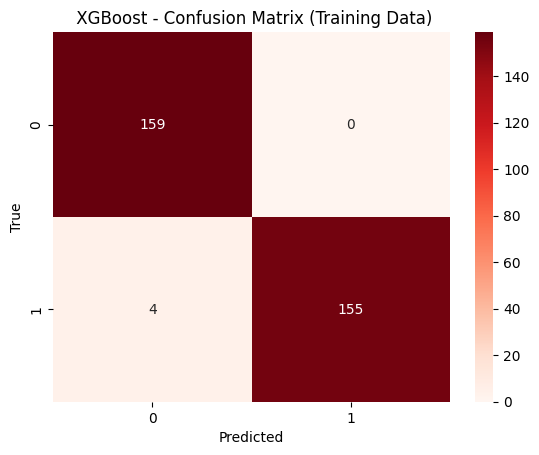


 XGBoost Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.88      0.95      0.92        40
           1       0.95      0.88      0.91        40

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



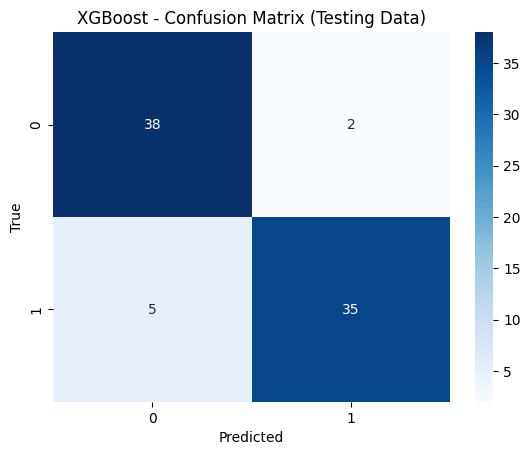

In [71]:
# Training Evaluation - XGBoost
xgb_train_pred = xgb_model.predict(X_train_scaled)
print("\n XGBoost Classification Report (Training Data):")
print(classification_report(y_train, xgb_train_pred))

sns.heatmap(confusion_matrix(y_train, xgb_train_pred), annot=True, fmt='d', cmap='Reds')
plt.title(" XGBoost - Confusion Matrix (Training Data)")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.show()

# Testing Evaluation - XGBoost
xgb_test_pred = xgb_model.predict(X_test_scaled)
print("\n XGBoost Classification Report (Testing Data):")
print(classification_report(y_test, xgb_test_pred))

sns.heatmap(confusion_matrix(y_test, xgb_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost - Confusion Matrix (Testing Data)")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.show()


# Hybrid CNN and XGBoost Model

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


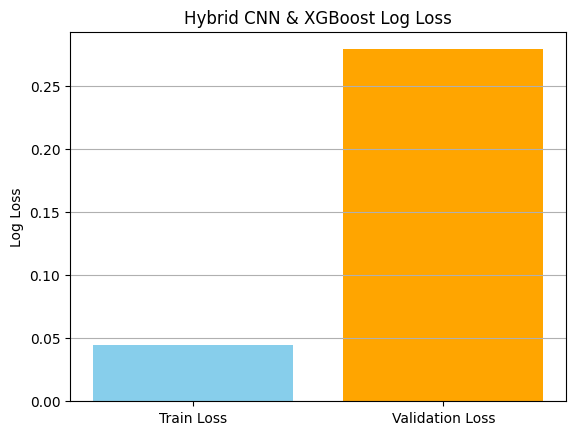

In [72]:
feature_model = Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_dense").output)
train_features = feature_model.predict(X_train_cnn)
test_features = feature_model.predict(X_test_cnn)

xgb_hybrid = XGBClassifier(eval_metric='logloss')
xgb_hybrid.fit(train_features, y_train)

# Log Loss Plot
train_preds_hybrid_proba = xgb_hybrid.predict_proba(train_features)[:, 1]
test_preds_hybrid_proba = xgb_hybrid.predict_proba(test_features)[:, 1]

train_loss = log_loss(y_train, train_preds_hybrid_proba)
val_loss = log_loss(y_test, test_preds_hybrid_proba)

plt.bar(['Train Loss', 'Validation Loss'], [train_loss, val_loss], color=['skyblue', 'orange'])
plt.title("Hybrid CNN & XGBoost Log Loss")
plt.ylabel("Log Loss")
plt.grid(axis='y')
plt.show()

## Evaluation


 Hybrid Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       159
           1       1.00      0.97      0.98       159

    accuracy                           0.98       318
   macro avg       0.98      0.98      0.98       318
weighted avg       0.98      0.98      0.98       318



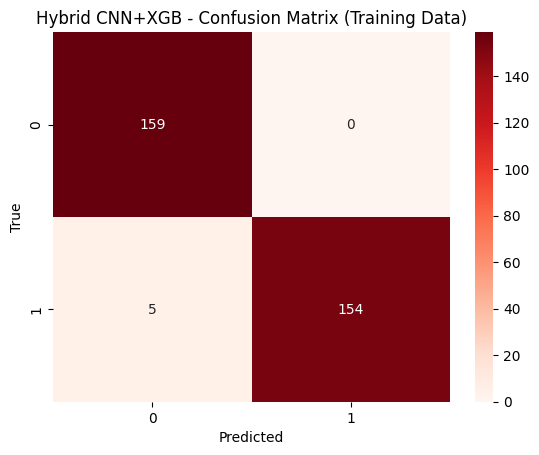


 Hybrid Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        40
           1       0.97      0.82      0.89        40

    accuracy                           0.90        80
   macro avg       0.91      0.90      0.90        80
weighted avg       0.91      0.90      0.90        80



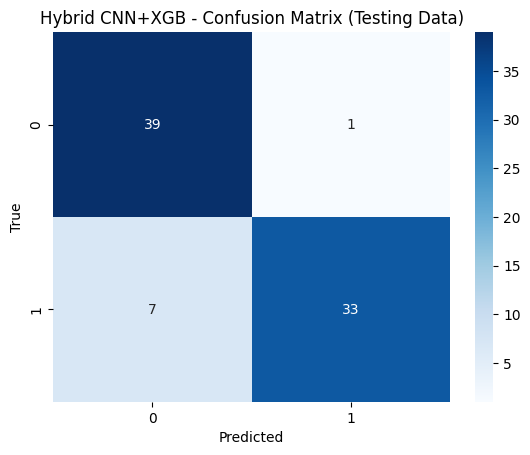

In [73]:
# Training Evaluation - Hybrid
hybrid_train_pred = xgb_hybrid.predict(train_features)
print("\n Hybrid Classification Report (Training Data):")
print(classification_report(y_train, hybrid_train_pred))

sns.heatmap(confusion_matrix(y_train, hybrid_train_pred), annot=True, fmt='d', cmap='Reds')
plt.title("Hybrid CNN+XGB - Confusion Matrix (Training Data)")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.show()

# Testing Evaluation - Hybrid
hybrid_test_pred = xgb_hybrid.predict(test_features)
print("\n Hybrid Classification Report (Testing Data):")
print(classification_report(y_test, hybrid_test_pred))

sns.heatmap(confusion_matrix(y_test, hybrid_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Hybrid CNN+XGB - Confusion Matrix (Testing Data)")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.show()

# Ensemble Models

# Hard Voting

In [74]:
y_pred_cnn_bin = y_pred_cnn.flatten()
y_pred_hard = mode(np.vstack([y_pred_cnn_bin, y_pred_xgb]).T, axis=1).mode.flatten()

## Evaluation


 Hard Voting Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       159
           1       1.00      0.90      0.95       159

    accuracy                           0.95       318
   macro avg       0.95      0.95      0.95       318
weighted avg       0.95      0.95      0.95       318



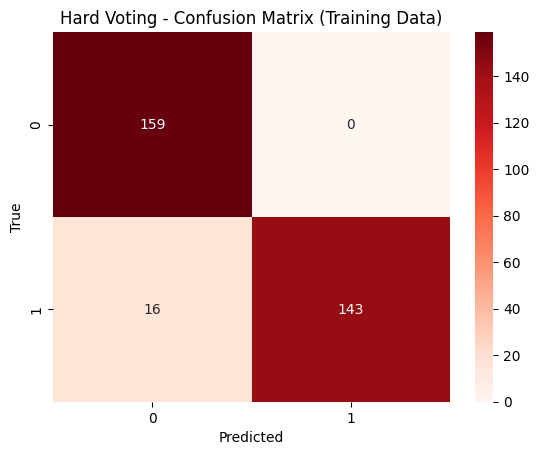


 Hard Voting Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.81      0.97      0.89        40
           1       0.97      0.78      0.86        40

    accuracy                           0.88        80
   macro avg       0.89      0.88      0.87        80
weighted avg       0.89      0.88      0.87        80



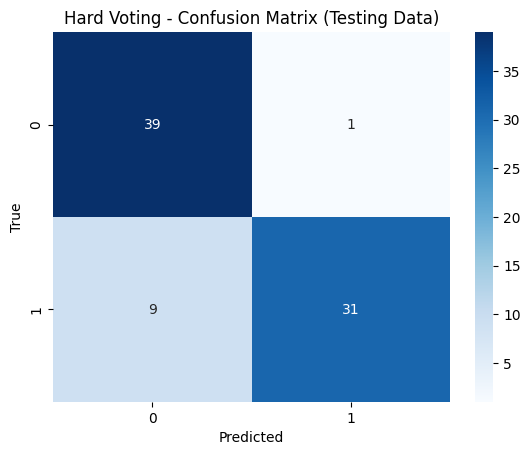

In [75]:
# Training Evaluation - Hard Voting
hard_train_pred = mode(np.vstack([cnn_train_pred.flatten(), xgb_train_pred]).T, axis=1).mode.flatten()
print("\n Hard Voting Classification Report (Training Data):")
print(classification_report(y_train, hard_train_pred))

sns.heatmap(confusion_matrix(y_train, hard_train_pred), annot=True, fmt='d', cmap='Reds')
plt.title("Hard Voting - Confusion Matrix (Training Data)")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.show()

# Testing Evaluation - Hard Voting
hard_test_pred = mode(np.vstack([cnn_test_pred.flatten(), xgb_test_pred]).T, axis=1).mode.flatten()
print("\n Hard Voting Classification Report (Testing Data):")
print(classification_report(y_test, hard_test_pred))

sns.heatmap(confusion_matrix(y_test, hard_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Hard Voting - Confusion Matrix (Testing Data)")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.show()

# Soft Voting

In [76]:
cnn_probs = cnn_model.predict(X_test_cnn).flatten()
xgb_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]
soft_avg = 0.4 * cnn_probs + 0.6 * xgb_probs
y_pred_soft = (soft_avg > 0.5).astype(int)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


## Evaluation

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

 Soft Voting Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       159
           1       0.99      0.96      0.97       159

    accuracy                           0.97       318
   macro avg       0.98      0.97      0.97       318
weighted avg       0.98      0.97      0.97       318



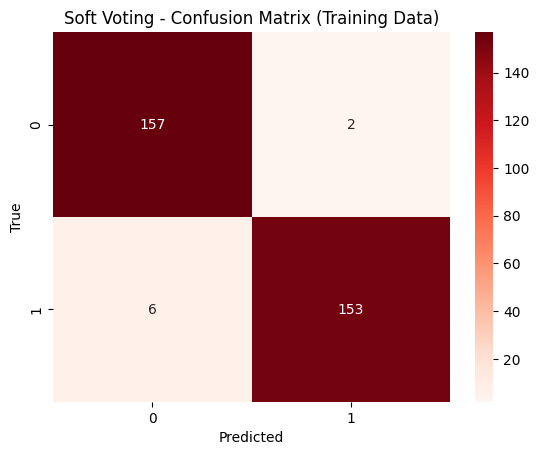

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

 Soft Voting Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.95      0.93      0.94        40

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



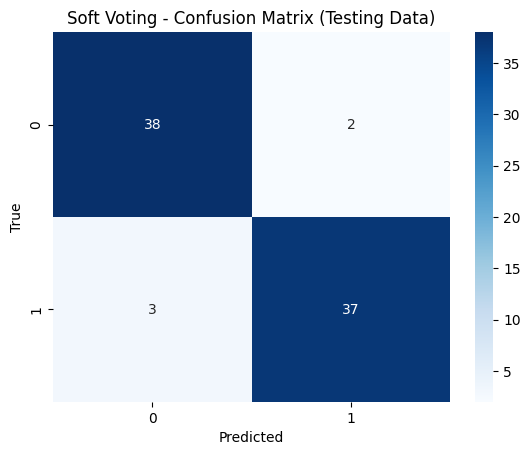

In [77]:
# Training Evaluation - Soft Voting
cnn_train_proba = cnn_model.predict(X_train_cnn).flatten()
xgb_train_proba = xgb_model.predict_proba(X_train_scaled)[:, 1]
soft_train_avg = 0.4 * cnn_train_proba + 0.6 * xgb_train_proba
soft_train_pred = (soft_train_avg > 0.5).astype(int)

print("\n Soft Voting Classification Report (Training Data):")
print(classification_report(y_train, soft_train_pred))

sns.heatmap(confusion_matrix(y_train, soft_train_pred), annot=True, fmt='d', cmap='Reds')
plt.title("Soft Voting - Confusion Matrix (Training Data)")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.show()

# Testing Evaluation - Soft Voting
cnn_test_proba = cnn_model.predict(X_test_cnn).flatten()
xgb_test_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
soft_test_avg = 0.4 * cnn_test_proba + 0.6 * xgb_test_proba
soft_test_pred = (soft_test_avg > 0.5).astype(int)

print("\n Soft Voting Classification Report (Testing Data):")
print(classification_report(y_test, soft_test_pred))

sns.heatmap(confusion_matrix(y_test, soft_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Soft Voting - Confusion Matrix (Testing Data)")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.show()


# Summary Report

In [78]:
y_pred_test_cnn = y_pred_cnn
y_pred_test_xgb = y_pred_xgb
y_pred_test_hybrid = y_pred_hybrid
y_pred_test_hard = y_pred_hard
y_pred_test_soft = y_pred_soft

# === Generate classification reports as dictionaries ===
report_cnn = classification_report(y_test, y_pred_test_cnn, output_dict=True)
report_xgb = classification_report(y_test, y_pred_test_xgb, output_dict=True)
report_hybrid = classification_report(y_test, y_pred_test_hybrid, output_dict=True)
report_hard = classification_report(y_test, y_pred_test_hard, output_dict=True)
report_soft = classification_report(y_test, y_pred_test_soft, output_dict=True)

# === Create the results summary DataFrame ===
results = pd.DataFrame({
    "Model": [
        "CNN Only",
        "XGBoost Only",
        "Hybrid (CNN & XGB)",
        "Ensemble (Hard Vote)",
        "Ensemble (Soft Vote)"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_test_cnn),
        accuracy_score(y_test, y_pred_test_xgb),
        accuracy_score(y_test, y_pred_test_hybrid),
        accuracy_score(y_test, y_pred_test_hard),
        accuracy_score(y_test, y_pred_test_soft),
    ],
    "Precision Malware": [
        report_cnn['1']['precision'],
        report_xgb['1']['precision'],
        report_hybrid['1']['precision'],
        report_hard['1']['precision'],
        report_soft['1']['precision'],
    ],
    "Recall Malware": [
        report_cnn['1']['recall'],
        report_xgb['1']['recall'],
        report_hybrid['1']['recall'],
        report_hard['1']['recall'],
        report_soft['1']['recall'],
    ],
    "F1 Malware": [
        report_cnn['1']['f1-score'],
        report_xgb['1']['f1-score'],
        report_hybrid['1']['f1-score'],
        report_hard['1']['f1-score'],
        report_soft['1']['f1-score'],
    ]
})

# === Final display ===
results.set_index("Model", inplace=True)
results


,Accuracy,Precision Malware,Recall Malware,F1 Malware
Model,,,,
CNN Only,0.8750,0.857143,0.900,0.878049
XGBoost Only,0.9125,0.945946,0.875,0.909091
Hybrid (CNN & XGB),0.9125,0.945946,0.875,0.909091
Ensemble (Hard Vote),0.8875,0.969697,0.800,0.876712
Ensemble (Soft Vote),0.9375,0.948718,0.925,0.936709


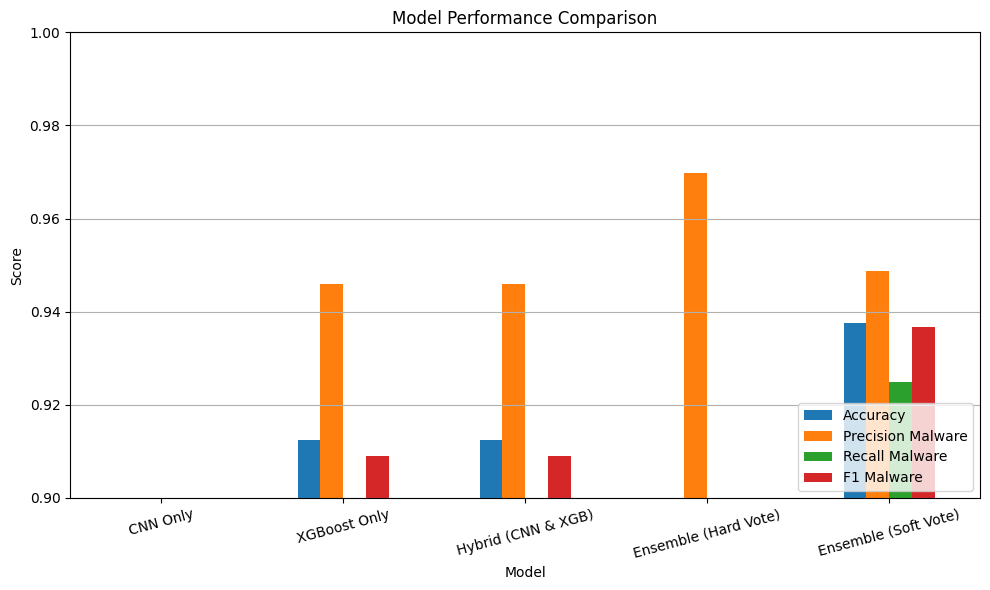

In [79]:
results.plot(kind='bar', figsize=(10, 6), rot=15)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.9, 1.0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()